DATATHON - PASSOS MÁGICOS

#Importando Bibliotecas

In [ ]:
#Se necessário, instalar tirando o # das linhas inferiores
#!pip install statsforecast
#!pip install --upgrade statsmodels
#!pip install pmdarima
#!pip install prophet
#!pip install sklearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rich import print

#Dicionário de Dados

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('max_colwidth', None)

In [ ]:
url_1 = 'https://github.com/OsvaldoCaio/data-analytics-postech-fiap/blob/5fb98805094c6b1cd4b8b2da8799c1c7f3a735e2/Fase%205%20-%20Deep%20Learning%20and%20Unstructured%20Data/Dicion%C3%A1rio_Dados_Datathon.xlsx?raw=true'
dfdi = pd.read_excel(url_1)
dfdi.head(65)

,CODIGO,DESCRICAO
0,NOME,Nome do Aluno (Dados esta o Anonimizados)
1,INSTITUICAO_ENSINO_ALUNO_2020,Mostra instituição de Ensino do Aluno em 2020
2,IDADE_ALUNO_2020,Idade do Aluno em 2020
3,ANOS_PM_2020,Tempo (Em Anos) que o Alunos esta na Passos Má...
4,FASE_TURMA_2020,Fase e Turma do Aluno na Passos Mágicos em 202...
...,...,...
60,QTDE_AVAL_2022,Quantidade de Avaliações do Aluno em 2022
61,REC_AVAL_1_2022,Recomendação da Equipe de Avaliação 1 em 2022
62,REC_AVAL_2_2022,Recomendação da Equipe de Avaliação 2 em 2022
63,REC_AVAL_3_2022,Recomendação da Equipe de Avaliação 3 em 2022


In [ ]:
dfdi

,CODIGO,DESCRICAO
0,NOME,Nome do Aluno (Dados esta o Anonimizados)
1,INSTITUICAO_ENSINO_ALUNO_2020,Mostra instituição de Ensino do Aluno em 2020
2,IDADE_ALUNO_2020,Idade do Aluno em 2020
3,ANOS_PM_2020,Tempo (Em Anos) que o Alunos esta na Passos Má...
4,FASE_TURMA_2020,Fase e Turma do Aluno na Passos Mágicos em 202...
...,...,...
65,INDICADO_BOLSA_2022,Campo do Tipo Booleano que sinaliza se o Aluno...
66,PONTO_VIRADA_2022,Campo do Tipo Booleano que sinaliza se o Aluno...
67,IPV_2022,Indicador de Ponto de Virada – Média das Notas...
68,IAN_2022,Indicador de Adequação ao Nível – Média das No...


In [ ]:
#dfdi = pd.read_excel('/content/Dicionário_Dados_Datathon.xlsx')
#dfdi.head(65)

#Análise e dados de municípios para comparativo à Mogi Guaçu

###Dicionário municípios

Cada uma destas cidades se devem por que cada uma delas é lider em algum dos criterios apresentados nas colunas.

In [ ]:
url_2 = 'https://github.com/OsvaldoCaio/data-analytics-postech-fiap/blob/5fb98805094c6b1cd4b8b2da8799c1c7f3a735e2/Fase%205%20-%20Deep%20Learning%20and%20Unstructured%20Data/DIC__Ranking_Competitividade.xlsx?raw=true'
dfdrc = pd.read_excel(url_2)
dfdrc

,INDICADOR,DESCRIÇÃO
0,Município,As cidades apresentadas se destacam entre algu...
1,População (2022),Refere-se ao número total de habitantes em cad...
2,Qualidade da Saúde,Avalia a condição de saúde da população do mun...
3,Taxa de Mortalidade Infantil,Refere-se ao número de crianças que morrem ant...
4,Acesso à Educação,Representa a porcentagem de crianças e jovens ...
5,Qualidade da Educação,Geralmente medida pelo Índice de Desenvolvimen...
6,Segurança,Indicada pela taxa de homicídios por 100 mil h...
7,Saneamento,Refere-se à porcentagem da população que tem a...
8,Meio Ambiente,Medido através de um índice de sustentabilidad...
9,PIB per capita,Refletido pelo Produto Interno Bruto (PIB) per...


In [ ]:
#dfdrc = pd.read_excel('/content/DIC__Ranking_Competitividade.xlsx')
#dfdrc

###Dados municípios

In [ ]:
url_3 = 'https://github.com/OsvaldoCaio/data-analytics-postech-fiap/blob/5fb98805094c6b1cd4b8b2da8799c1c7f3a735e2/Fase%205%20-%20Deep%20Learning%20and%20Unstructured%20Data/Ranking_Competitividade_Municipios_2023.xlsx?raw=true'
dfc = pd.read_excel(url_3)
dfc

,UF,Município,População_2022,Qualidade_saúde,Taxa_Mortalidade_Infantil,Acesso_educação,Qualidade_educacao,Segurança,Saneamento,Meio_ambiente,PIB_per_capita,Ranking_Geral,Dimensão_Instituições,Dimensão_Sociedade,Dimensão_Economia
0,RS,Caxias do Sul,5.273730e+05,0.797,18.50,0.983,6.1,18.5,0.800,74,47800,98,0.789,0.803,0.811
1,SP,Embu-Guaçu,6.697000e+04,0.000,9.27,0.971,4.7,12.4,0.590,52,20683,2780,0.649,0.668,0.689
2,SC,Florianópolis,5.475400e+05,0.831,16.70,0.988,6.5,16.7,0.960,82,56300,14,0.812,0.825,0.829
3,SP,São Caetano do Sul,1.611270e+05,0.846,7.20,0.996,6.8,7.2,0.990,81,100300,1,0.847,0.856,0.861
4,SP,São Paulo,1.145124e+07,0.813,8.90,0.978,5.4,8.9,0.950,77,63200,3,0.819,0.832,0.845
5,CE,Sobral,2.189110e+05,0.727,15.70,0.991,7.2,15.7,0.780,67,23600,390,0.736,0.726,0.749
6,SP,Várzea Paulista,1.160130e+05,0.726,18.20,0.980,5.3,18.2,0.850,64,32500,2130,0.683,0.682,0.693
7,BR,Média,3.049840e+05,0.746,12.40,0.981,5.9,23.9,0.508,65,46154,2785,0.720,0.740,0.780


In [ ]:
#dfc = pd.read_excel('/content/Ranking_Competitividade_Municipios_2023.xlsx')
#dfc

In [ ]:
dfc.shape

(8, 15)

In [ ]:
# Alternativa: Converter apenas as colunas numéricas para float
colunas_numericas = dfc.select_dtypes(include=['number']).columns

# Converter apenas colunas numéricas para float
dfc[colunas_numericas] = dfc[colunas_numericas].astype(float)

# Arredondar todas as colunas numéricas para duas casas decimais
dfc[colunas_numericas] = dfc[colunas_numericas].round(2)
dfc

,UF,Município,População_2022,Qualidade_saúde,Taxa_Mortalidade_Infantil,Acesso_educação,Qualidade_educacao,Segurança,Saneamento,Meio_ambiente,PIB_per_capita,Ranking_Geral,Dimensão_Instituições,Dimensão_Sociedade,Dimensão_Economia
0,RS,Caxias do Sul,527373.00,0.80,18.50,0.98,6.1,18.5,0.80,74.0,47800.0,98.0,0.79,0.80,0.81
1,SP,Embu-Guaçu,66970.00,0.00,9.27,0.97,4.7,12.4,0.59,52.0,20683.0,2780.0,0.65,0.67,0.69
2,SC,Florianópolis,547540.00,0.83,16.70,0.99,6.5,16.7,0.96,82.0,56300.0,14.0,0.81,0.82,0.83
3,SP,São Caetano do Sul,161127.00,0.85,7.20,1.00,6.8,7.2,0.99,81.0,100300.0,1.0,0.85,0.86,0.86
4,SP,São Paulo,11451245.00,0.81,8.90,0.98,5.4,8.9,0.95,77.0,63200.0,3.0,0.82,0.83,0.84
5,CE,Sobral,218911.00,0.73,15.70,0.99,7.2,15.7,0.78,67.0,23600.0,390.0,0.74,0.73,0.75
6,SP,Várzea Paulista,116013.00,0.73,18.20,0.98,5.3,18.2,0.85,64.0,32500.0,2130.0,0.68,0.68,0.69
7,BR,Média,304984.05,0.75,12.40,0.98,5.9,23.9,0.51,65.0,46154.0,2785.0,0.72,0.74,0.78


###Gráficos municípios

<ipython-input-89-5060520162c8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='População_2022', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-89-5060520162c8>:16: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='População_2022', data=dfc, palette=dfc['Cor'].values)#18548c


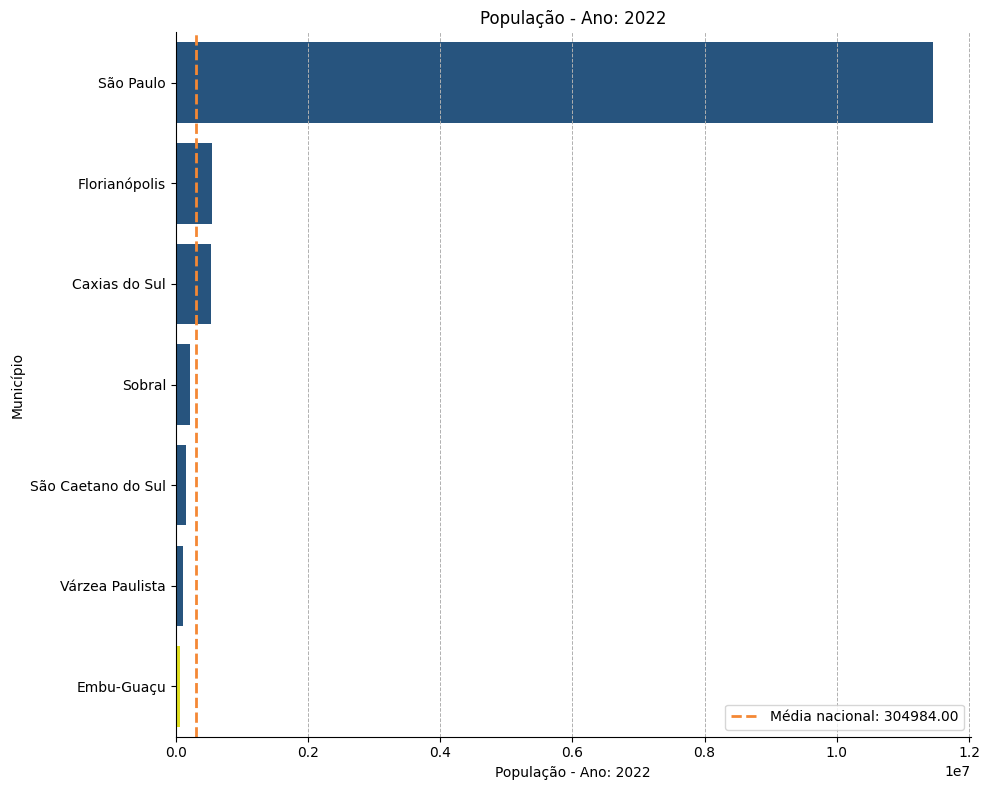

In [ ]:
#População_2022
valor_media = 304984

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='População_2022', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
bars = sns.barplot(y='Município', x='População_2022', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')#f48834

# Adicionar título e rótulos
plt.title('População - Ano: 2022')
plt.xlabel('População - Ano: 2022')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-90-e418b15581b6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Qualidade_saúde', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-90-e418b15581b6>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Qualidade_saúde', data=dfc, palette=dfc['Cor'].values)#18548c


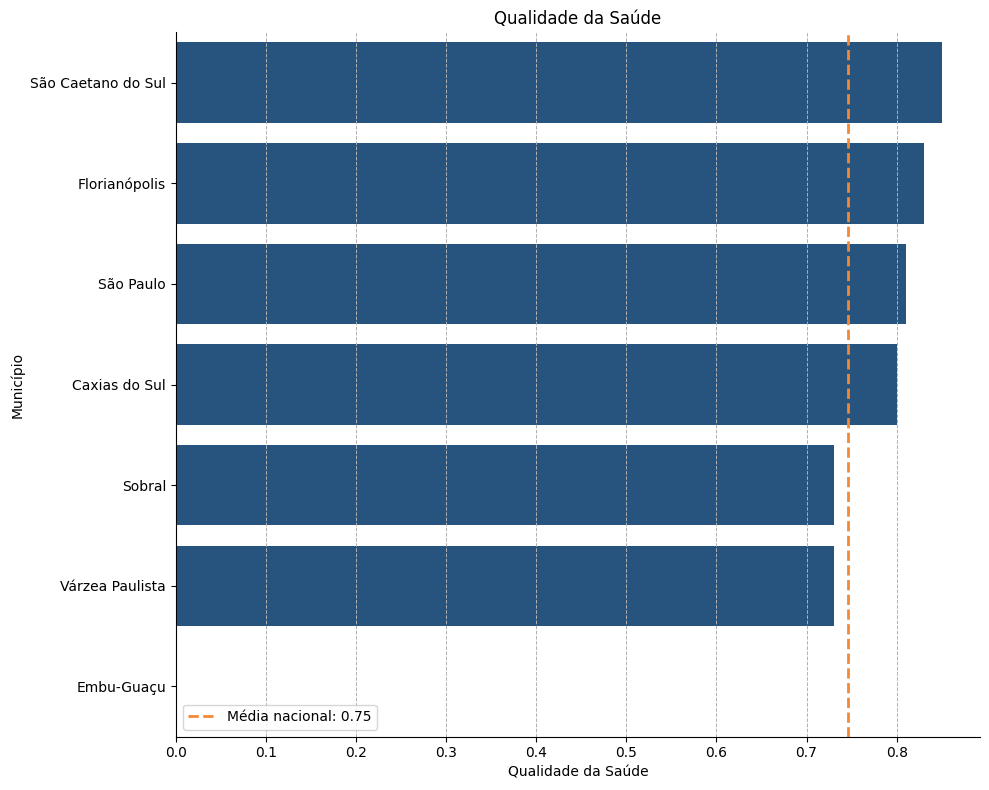

In [ ]:
#Qualidade_saúde
valor_media = 0.746

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Qualidade_saúde', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Qualidade_saúde', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Qualidade_saúde', data=dfc, palette=dfc['Cor'].values)#18548c
# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Qualidade da Saúde')
plt.xlabel('Qualidade da Saúde')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)  # Remover as bordas superior e direita

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-91-6114d3b89a3a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Taxa_Mortalidade_Infantil', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-91-6114d3b89a3a>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Taxa_Mortalidade_Infantil', data=dfc, palette=dfc['Cor'].values)#18548c


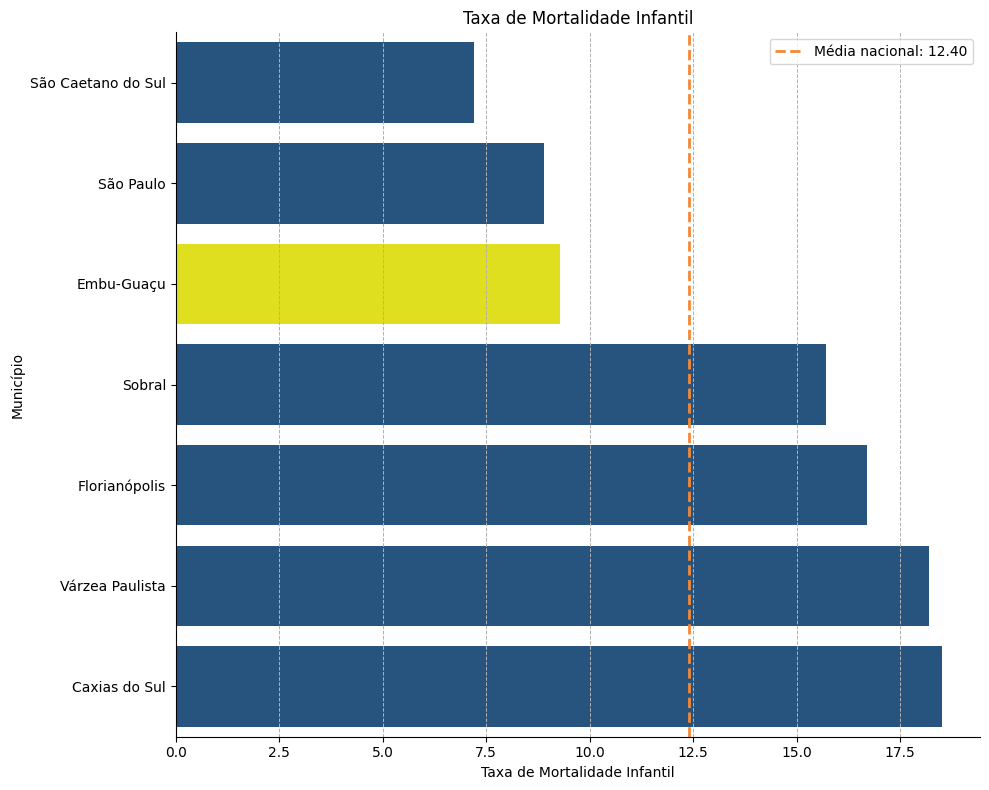

In [ ]:
#Taxa_Mortalidade_Infantil
valor_media = 12.40

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Taxa_Mortalidade_Infantil', ascending=True)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Taxa_Mortalidade_Infantil', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Taxa_Mortalidade_Infantil', data=dfc, palette=dfc['Cor'].values)#18548c
# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Taxa de Mortalidade Infantil')
plt.xlabel('Taxa de Mortalidade Infantil')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-92-ec0ea0909c66>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Acesso_educação', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-92-ec0ea0909c66>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Acesso_educação', data=dfc, palette=dfc['Cor'].values)#18548c


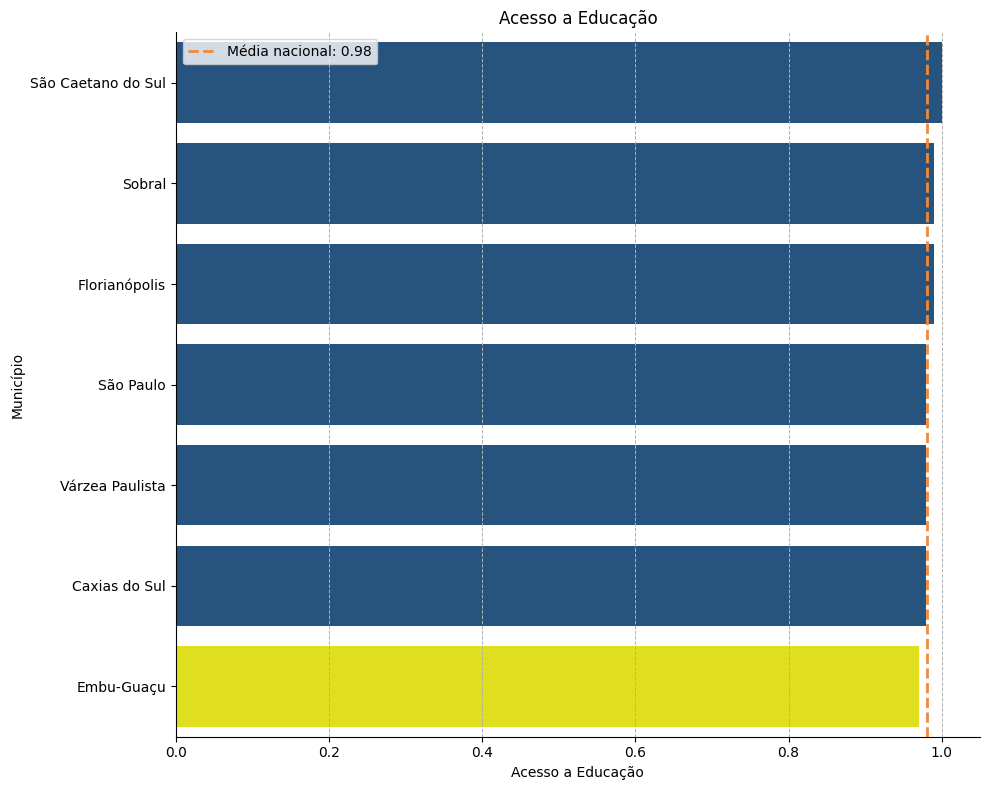

In [ ]:
#Acesso_educação
valor_media = 0.981

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Acesso_educação', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Acesso_educação', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Acesso_educação', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Acesso a Educação')
plt.xlabel('Acesso a Educação')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-93-b5179591508b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Qualidade_educacao', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-93-b5179591508b>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Qualidade_educacao', data=dfc, palette=dfc['Cor'].values)#18548c


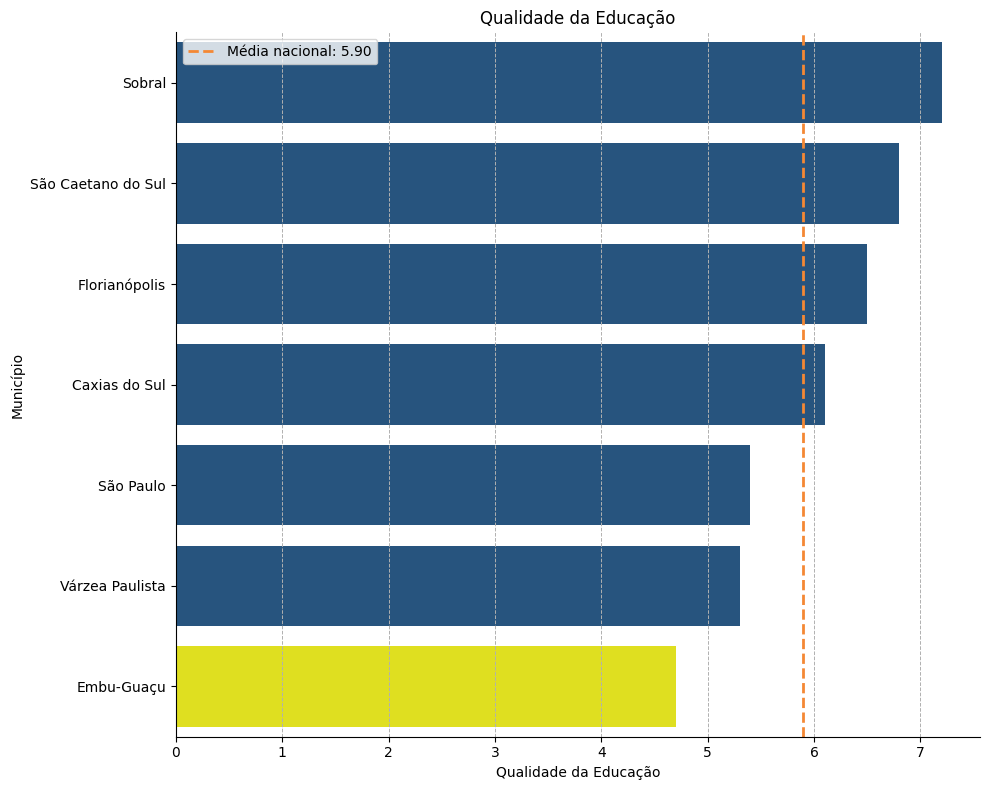

In [ ]:
#Qualidade_educacao
valor_media = 5.9

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Qualidade_educacao', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Qualidade_educacao', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Qualidade_educacao', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Qualidade da Educação')
plt.xlabel('Qualidade da Educação')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-94-427738142f18>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Segurança', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-94-427738142f18>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Segurança', data=dfc, palette=dfc['Cor'].values)#18548c


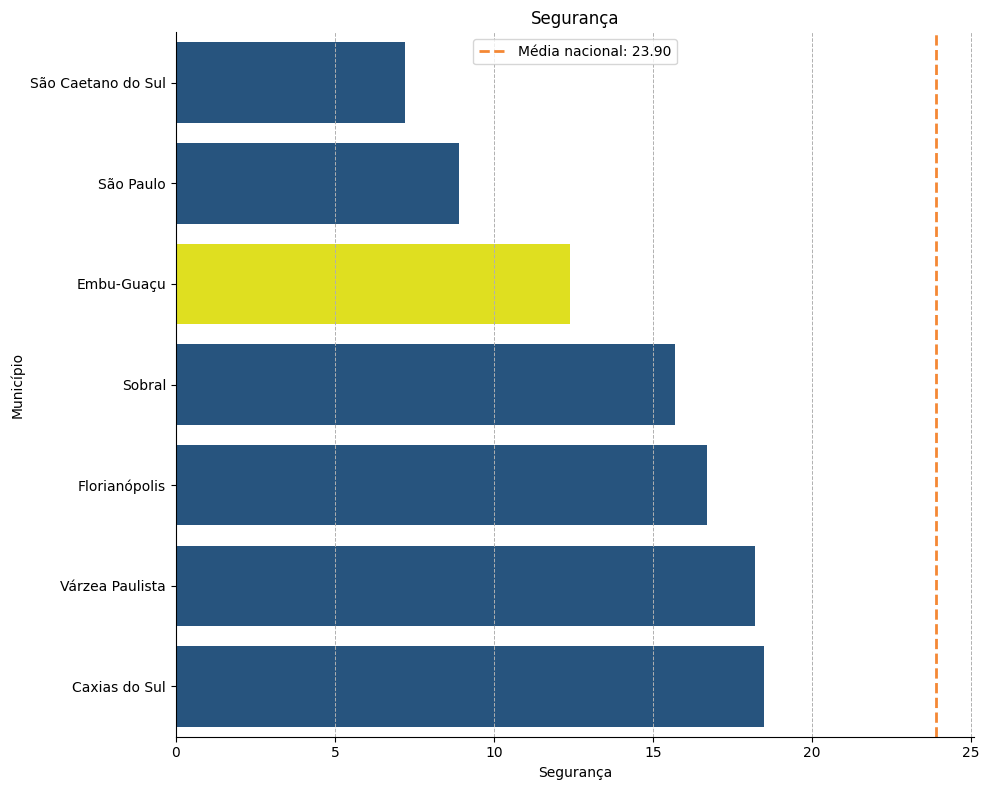

In [ ]:
#Segurança
valor_media = 23.9

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Segurança', ascending=True)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Segurança', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Segurança', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Segurança')
plt.xlabel('Segurança')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-95-97ad2e94b8ce>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Saneamento', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-95-97ad2e94b8ce>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Saneamento', data=dfc, palette=dfc['Cor'].values)#18548c


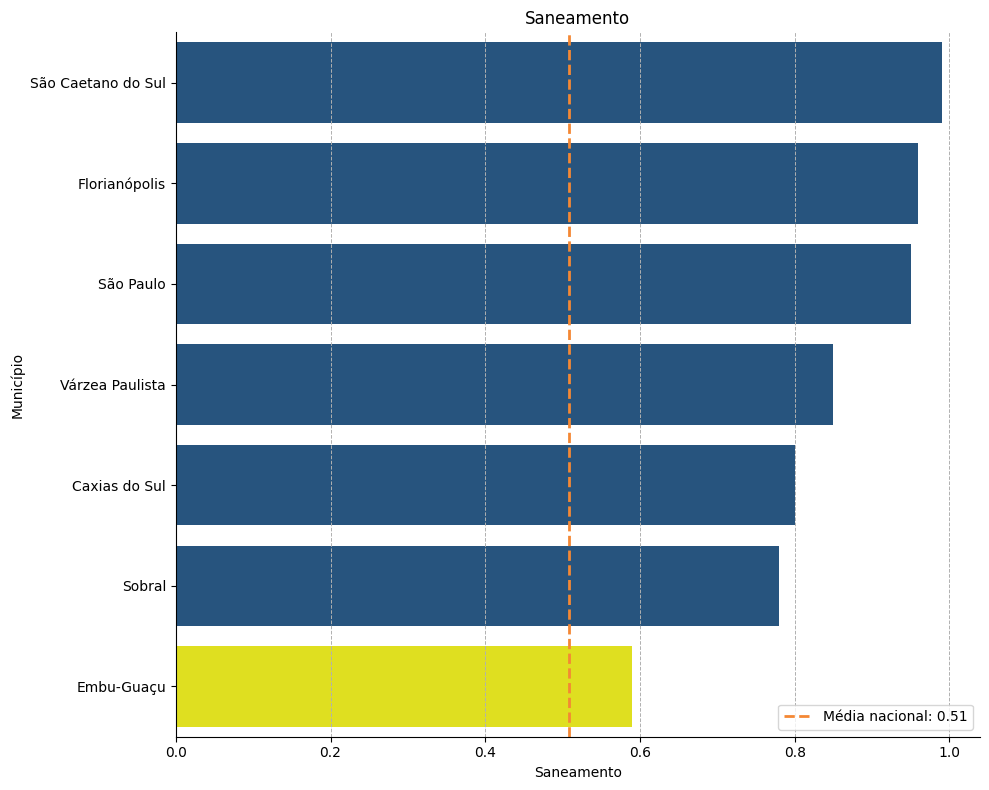

In [ ]:
#Saneamento
valor_media = 0.508

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Saneamento', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Saneamento', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Saneamento', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Saneamento')
plt.xlabel('Saneamento')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-96-4f2fd3114420>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Meio_ambiente', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-96-4f2fd3114420>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Meio_ambiente', data=dfc, palette=dfc['Cor'].values)#18548c


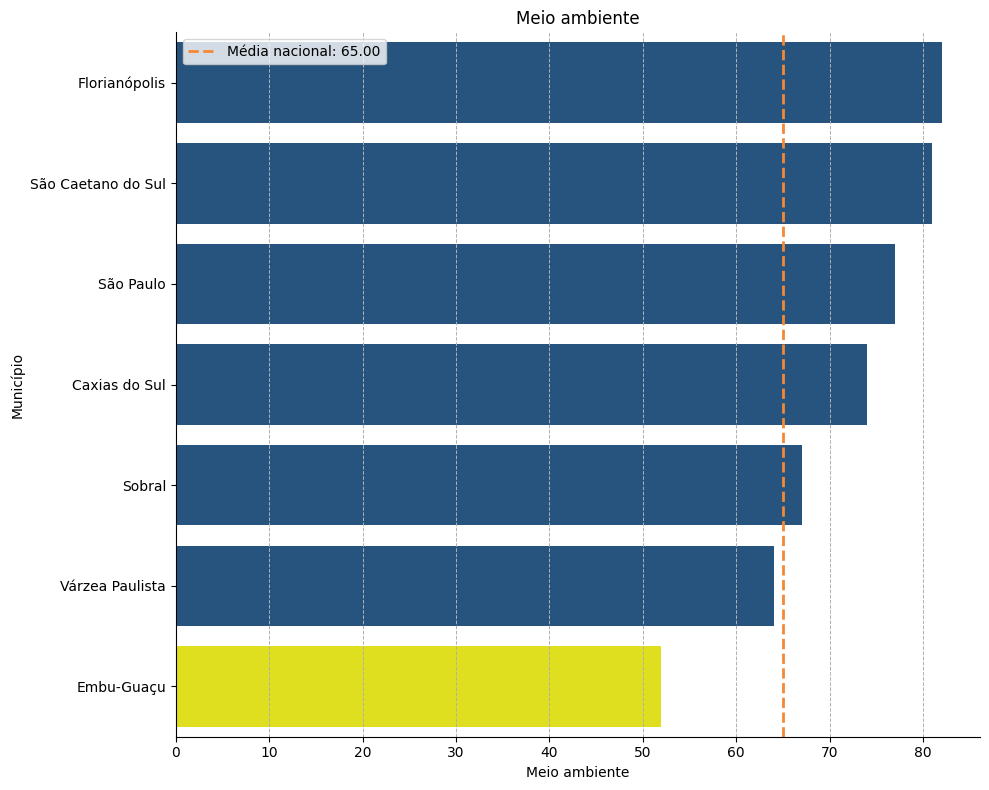

In [ ]:
#Meio_ambiente
valor_media = 65

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Meio_ambiente', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Meio_ambiente', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Meio_ambiente', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Meio ambiente')
plt.xlabel('Meio ambiente')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-97-fa1f7b9167b7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='PIB_per_capita', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-97-fa1f7b9167b7>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='PIB_per_capita', data=dfc, palette=dfc['Cor'].values)#18548c


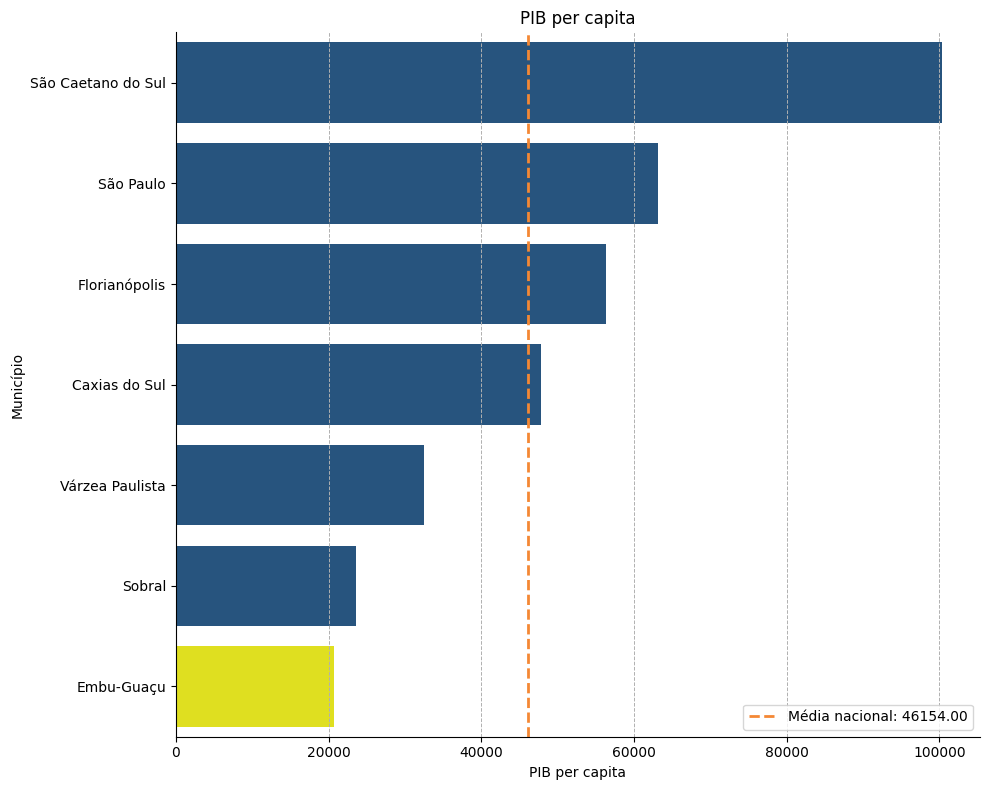

In [ ]:
#PIB_per_capita
valor_media = 46154

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='PIB_per_capita', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Inovação_dinamismo_economico', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='PIB_per_capita', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('PIB per capita')
plt.xlabel('PIB per capita')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-98-3210049f9716>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Ranking_Geral', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-98-3210049f9716>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Ranking_Geral', data=dfc, palette=dfc['Cor'].values)#18548c


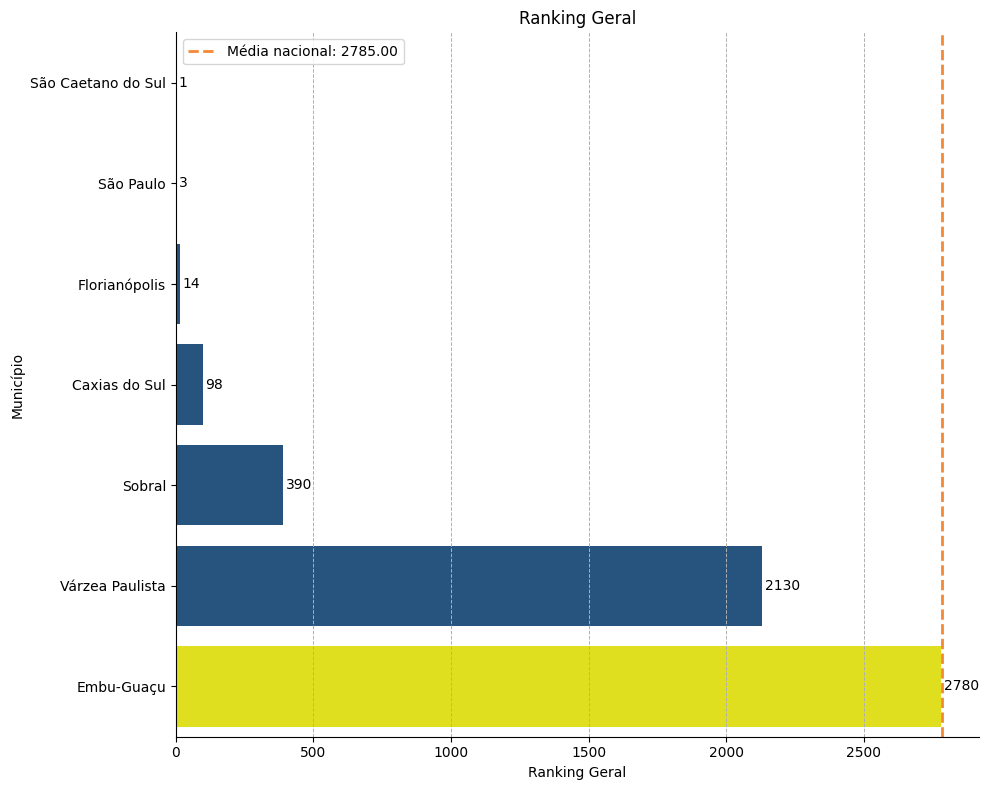

In [ ]:
#Ranking_Geral
valor_media = 2785

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Ranking_Geral', ascending=True)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Ranking_Geral', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Ranking_Geral', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Ranking Geral')
plt.xlabel('Ranking Geral')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar labels com os números correspondentes aos dados
for bar, municipio, ranking in zip(bars.patches, dfc['Município'], dfc['Ranking_Geral']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f'{ranking:.0f}',
             va='center', fontsize=10, color='black')

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-99-c8643676fc02>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Dimensão_Instituições', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-99-c8643676fc02>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Dimensão_Instituições', data=dfc, palette=dfc['Cor'].values)#18548c


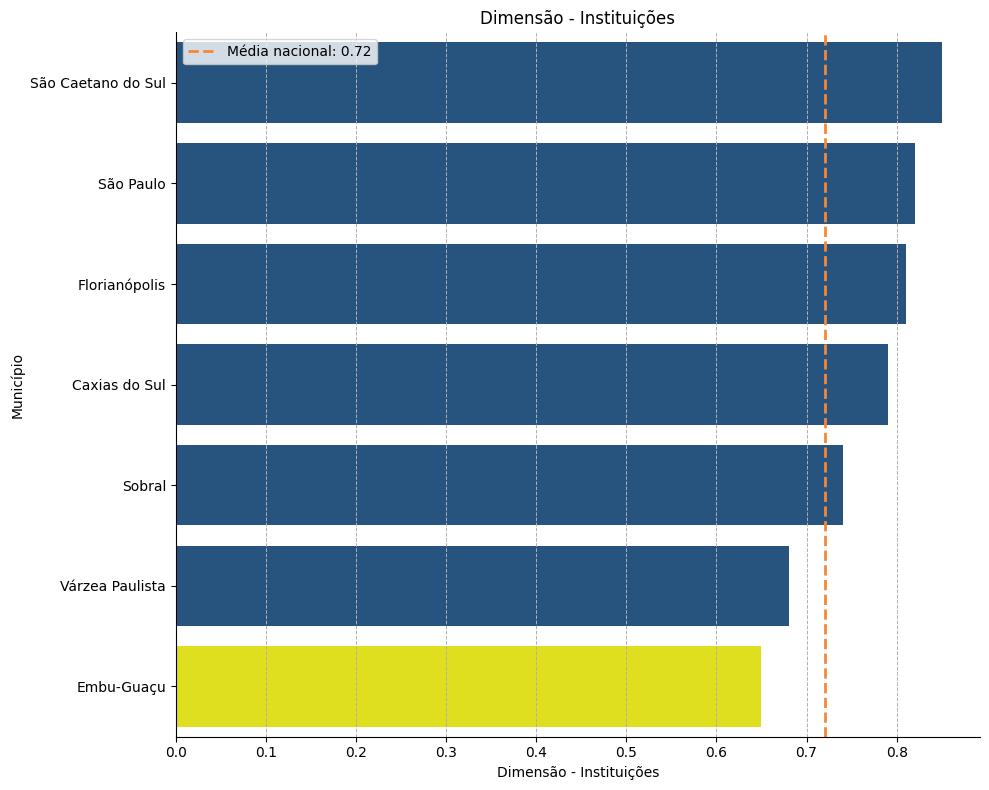

In [ ]:
#Dimensão_Instituições
valor_media = 0.72

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Dimensão_Instituições', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Dimensão_Instituições', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Dimensão_Instituições', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Dimensão - Instituições')
plt.xlabel('Dimensão - Instituições')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-100-53d44b2d5e6e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Dimensão_Sociedade', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-100-53d44b2d5e6e>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Dimensão_Sociedade', data=dfc, palette=dfc['Cor'].values)#18548c


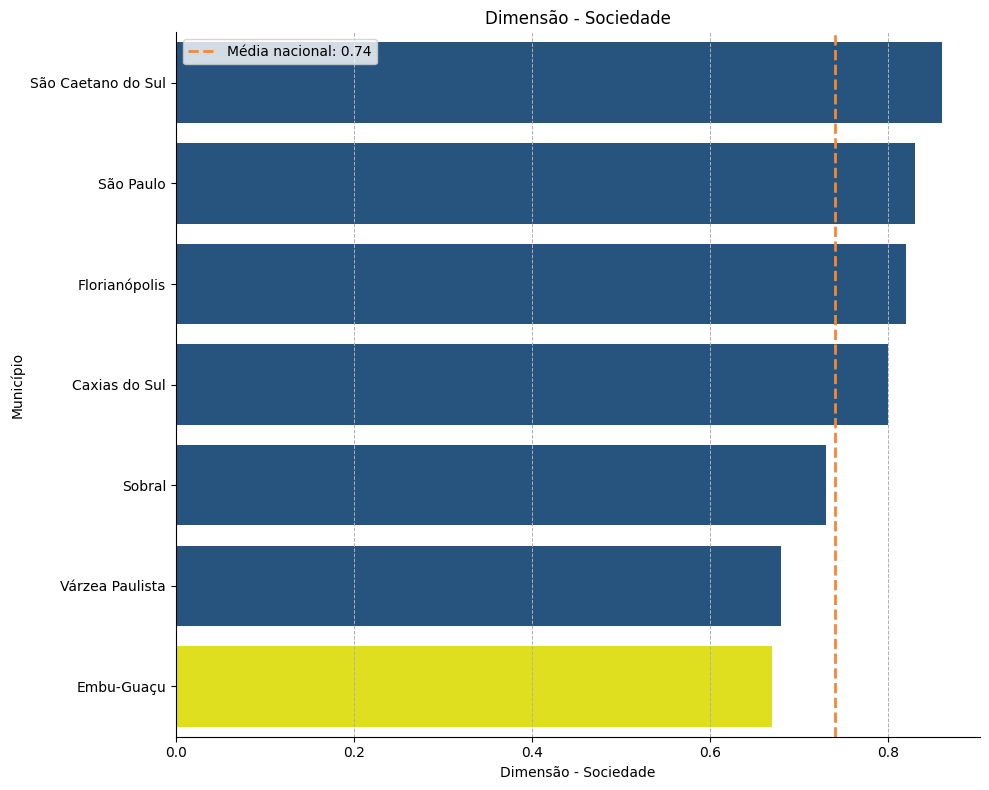

In [ ]:
#Dimensão_Sociedade
valor_media = 0.74

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Dimensão_Sociedade', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Dimensão_Sociedade', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Dimensão_Sociedade', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Dimensão - Sociedade')
plt.xlabel('Dimensão - Sociedade')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-101-bc38560e33b7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(y='Município', x='Dimensão_Economia', data=dfc, palette=dfc['Cor'].values)#18548c
<ipython-input-101-bc38560e33b7>:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(y='Município', x='Dimensão_Economia', data=dfc, palette=dfc['Cor'].values)#18548c


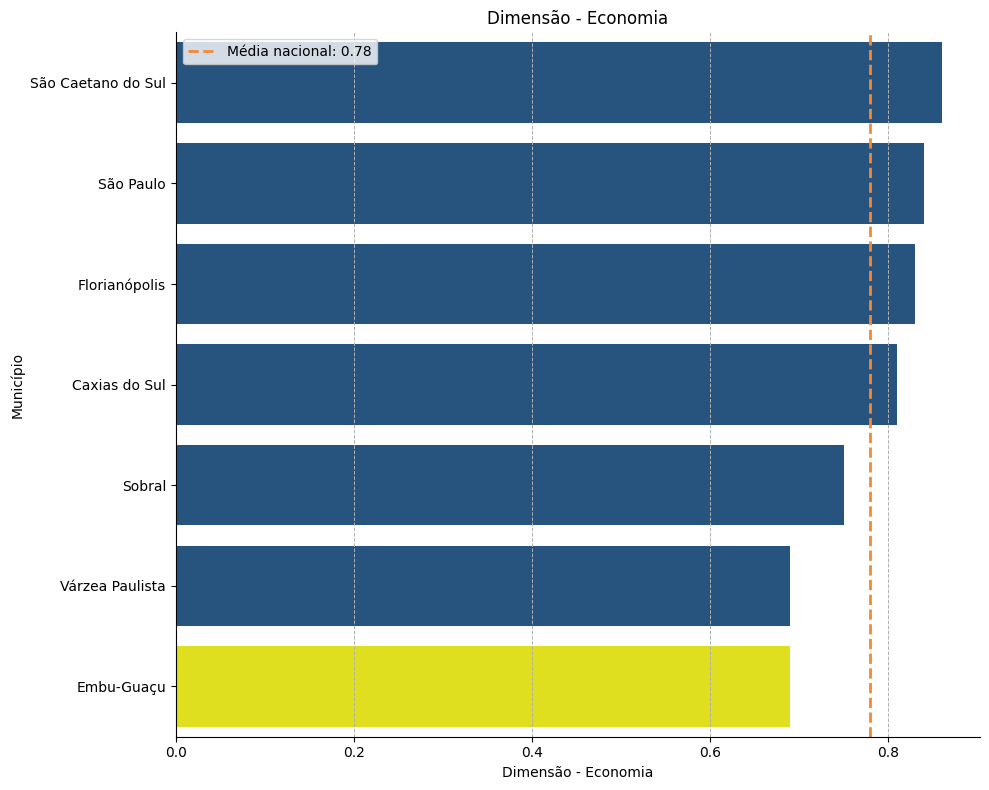

In [ ]:
#Dimensão_Economia
valor_media = 0.78

dfc['Cor'] = dfc['Município'].apply(lambda x: 'yellow' if x == 'Embu-Guaçu' else '#18548c')

# Remover a linha de média do DataFrame para evitar duplicação no gráfico
dfc = dfc[dfc['Município'] != 'Média']

# Ordenar os dados para melhor visualização
dfc = dfc.sort_values(by='Dimensão_Economia', ascending=False)

# Configurar o gráfico
plt.figure(figsize=(10, 8))  # Tamanho do gráfico

# Criar gráfico de barras horizontais
#sns.barplot(y='Município', x='Dimensão_Economia', data=dfc, color='#18548c')
bars = sns.barplot(y='Município', x='Dimensão_Economia', data=dfc, palette=dfc['Cor'].values)#18548c

# Adicionar linha vertical no valor da "Média"
plt.axvline(valor_media, color='#f48834', linestyle='--', linewidth=2, label=f'Média nacional: {valor_media:.2f}')

# Adicionar título e rótulos
plt.title('Dimensão - Economia')
plt.xlabel('Dimensão - Economia')
plt.ylabel('Município')

# Ajustar visualização do eixo y
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar grid para facilitar a visualização
plt.grid(axis='x', linestyle='--', linewidth=0.7)

plt.legend()
plt.tight_layout()
plt.show()

#Dados Passos Mágicos

##Dataset

In [ ]:
url_4 = 'https://github.com/OsvaldoCaio/data-analytics-postech-fiap/blob/5fb98805094c6b1cd4b8b2da8799c1c7f3a735e2/Fase%205%20-%20Deep%20Learning%20and%20Unstructured%20Data/PEDE_PASSOS_DATASET_FIAP.csv?raw=true'
df = pd.read_csv(url_4, sep=';')
df.head(7)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,Escola Pública,11,2,2H,Não,"7,88",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,63",Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,"7,92",5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,Escola Pública,12,2,3H,Não,"7,86",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,ALUNO-4,Escola Pública,10,2,1D,Não,"5,08",D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,25",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,"8,06",5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,Escola Pública,10,1,2M,Não,"8,08",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,"6,46",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,83",5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"6,25",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,5",10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,94",Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,"7,92",5.0,Fase 2 (5º e 6º ano)


In [ ]:
#df = pd.read_csv('/content/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')
#df.head(7)

In [ ]:
df.tail(7)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1343,ALUNO-1344,Escola Pública,14,2,1R,Não,"6,45",C,Ágata,Ponto a melhorar em 2021: Melhorar a sua entre...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1344,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1345,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,63",Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,"9,08",5.0,Fase 1 (4º ano)
1346,ALUNO-1347,Escola Pública,17,1,7B,Não,"7,16",C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1347,ALUNO-1348,Escola Pública,13,2,3R,Sim,"7,84",B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,72",Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,"5,83",5.0,Fase 5 (1º EM)
1348,ALUNO-1349,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"7,5",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Mantido na Fase + Bolsa,Sim,Não,6,5.0,Fase 5 (1º EM)
1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df.shape

(1350, 69)

In [ ]:
df

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,Escola Pública,11,2,2H,Não,"7,88",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,63",Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,"7,92",5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,Escola Pública,12,2,3H,Não,"7,86",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,ALUNO-4,Escola Pública,10,2,1D,Não,"5,08",D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,25",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,"8,06",5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,Escola Pública,10,1,2M,Não,"8,08",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,"6,46",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,83",5.0,Fase 3 (7º e 8º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,63",Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,"9,08",5.0,Fase 1 (4º ano)
1346,ALUNO-1347,Escola Pública,17,1,7B,Não,"7,16",C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1347,ALUNO-1348,Escola Pública,13,2,3R,Sim,"7,84",B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,72",Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,"5,83",5.0,Fase 5 (1º EM)
1348,ALUNO-1349,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"7,5",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,Mantido na Fase + Bolsa,Sim,Não,6,5.0,Fase 5 (1º EM)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           1349 non-null   object 
 1   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      1349 non-null   object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       1349 non-null   o

In [ ]:
df.describe()

,FASE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,IPV_2021,IAN_2021,DEFASAGEM_2021,FASE_2022,ANO_INGRESSO_2022,CG_2022,CF_2022,CT_2022,IPS_2022,QTD_AVAL_2022,IAN_2022
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.00000,686.000000,686.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,2.276968,8.153499,6.822595,6.843586,5.425948,7.576385,7.40758,6.902332,-0.752187,2.110209,2020.496520,431.500000,75.396752,6.617169,6.901102,3.056845,6.421114
std,1.798368,2.193629,2.458627,1.457148,2.141566,1.072318,1.62708,2.484979,0.792181,1.802222,1.787649,248.982262,52.314184,3.989485,1.070202,0.775806,2.387816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.500000,-4.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,2.500000,2.000000,2.500000
25%,1.000000,7.900000,5.300000,6.900000,4.100000,7.300000,6.60000,5.000000,-1.000000,1.000000,2019.000000,216.250000,30.000000,3.000000,6.250000,2.000000,5.000000
50%,2.000000,8.800000,7.200000,7.500000,5.850000,7.700000,7.70000,5.000000,-1.000000,2.000000,2021.000000,431.500000,66.500000,6.000000,7.500000,3.000000,5.000000
75%,3.000000,9.500000,8.800000,7.500000,6.900000,8.100000,8.60000,10.000000,0.000000,3.000000,2022.000000,646.750000,118.000000,9.750000,7.500000,4.000000,10.000000
max,7.000000,10.000000,10.000000,8.800000,9.500000,10.000000,10.00000,10.000000,3.000000,7.000000,2022.000000,862.000000,192.000000,18.000000,10.000000,4.000000,10.000000


In [ ]:
df.head(7)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,Escola Pública,11,2,2H,Não,"7,88",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,63",Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,"7,92",5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,Escola Pública,12,2,3H,Não,"7,86",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,ALUNO-4,Escola Pública,10,2,1D,Não,"5,08",D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,25",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,"8,06",5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,Escola Pública,10,1,2M,Não,"8,08",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,"6,46",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,83",5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"6,25",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,5",10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,"5,94",Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,"7,92",5.0,Fase 2 (5º e 6º ano)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           1349 non-null   object 
 1   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      1349 non-null   object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       1349 non-null   o

###SEM USO - Só para ver os dados sem os nulos.

In [ ]:
#df_sem_nulos = df.dropna()

In [ ]:
#df_sem_nulos.head(7)

In [ ]:
#df_sem_nulos.shape

In [ ]:
#df_sem_nulos.describe()

In [ ]:
#df_sem_nulos.info()

##Eliminar dados que contem Nulos e Erros

alunos com erros: 71| 506| 374| 1196

In [ ]:
df[df.index == 70]

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
70,ALUNO-71,Escola Pública,10,1,0A,Não,"7,55",B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df[df.index == 373]

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
373,ALUNO-374,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df[df.index == 505]

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
505,ALUNO-506,Escola Pública,7,0,0A,Não,"8,78",A,Topázio,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df[df.index == 1195]

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1195,ALUNO-1196,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df[df.index == 1258]

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1258,ALUNO-1259,V202,D108,D971,D207,D9600,#VALOR!,D9891/2,D9891/2A,D301,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
df = df.drop([70, 373, 505, 1195, 1258])

In [ ]:
df.shape

(1345, 69)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1349
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           1344 non-null   object 
 1   INSTITUICAO_ENSINO_ALUNO_2020  725 non-null    object 
 2   IDADE_ALUNO_2020               725 non-null    object 
 3   ANOS_PM_2020                   725 non-null    object 
 4   FASE_TURMA_2020                725 non-null    object 
 5   PONTO_VIRADA_2020              699 non-null    object 
 6   INDE_2020                      1344 non-null   object 
 7   INDE_CONCEITO_2020             725 non-null    object 
 8   PEDRA_2020                     725 non-null    object 
 9   DESTAQUE_IEG_2020              725 non-null    object 
 10  DESTAQUE_IDA_2020              725 non-null    object 
 11  DESTAQUE_IPV_2020              701 non-null    object 
 12  IAA_2020                       1344 non-null   object

##Correção de dados

In [ ]:
campos_numericos = dfdi[dfdi['CODIGO'].isin(['ANOS_PM_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'INDE_2020', 'INDE_2021'])].CODIGO.to_list()

In [ ]:
df[campos_numericos] = df[campos_numericos].replace(',', '.', regex=True).astype('float64').round(decimals=2)

In [ ]:
#df[campos_numericos] = df[campos_numericos].astype('float64').round(decimals=2)

In [ ]:
df.head()

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVAL_1_2022,REC_AVAL_2_2022,REC_AVAL_3_2022,REC_AVAL_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,Escola Pública,11,2.0,2H,Não,7.88,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,"5,63",Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,"7,92",5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,Escola Pública,12,2.0,3H,Não,7.86,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,ALUNO-4,Escola Pública,10,2.0,1D,Não,5.08,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,"6,25",Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,"8,06",5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,Escola Pública,10,1.0,2M,Não,8.08,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,"6,46",Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,"7,83",5.0,Fase 3 (7º e 8º ano)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1349
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NOME                           1344 non-null   object 
 1   INSTITUICAO_ENSINO_ALUNO_2020  725 non-null    object 
 2   IDADE_ALUNO_2020               725 non-null    object 
 3   ANOS_PM_2020                   725 non-null    float64
 4   FASE_TURMA_2020                725 non-null    object 
 5   PONTO_VIRADA_2020              699 non-null    object 
 6   INDE_2020                      1344 non-null   float64
 7   INDE_CONCEITO_2020             725 non-null    object 
 8   PEDRA_2020                     725 non-null    object 
 9   DESTAQUE_IEG_2020              725 non-null    object 
 10  DESTAQUE_IDA_2020              725 non-null    object 
 11  DESTAQUE_IPV_2020              701 non-null    object 
 12  IAA_2020                       1344 non-null   float6

##Trabalhar com os 'Anos'

In [ ]:
#2020
df['REC_AVAL_1_2020'] = np.nan
df['REC_AVAL_2_2020'] = np.nan
df['REC_AVAL_3_2020'] = np.nan
df['REC_AVAL_4_2020'] = np.nan
df['NIVEL_IDEAL_2020'] = np.nan
df['DEFASAGEM_2020'] = np.nan
df['SINALIZADOR_INGRESSANTE_2020'] = np.nan
df['CG_2020'] = np.nan
df['CF_2020'] = np.nan
df['CT_2020'] = np.nan
df['NOTA_PORT_2020'] = np.nan
df['NOTA_MAT_2020'] = np.nan
df['NOTA_ING_2020'] = np.nan
df['QTD_AVAL_2020'] = np.nan
df['BOLSISTA_2020'] = np.nan
df['INDICADO_BOLSA_2020'] = np.nan
df['ANO_INGRESSO_2020'] = np.nan
df['IDADE_ALUNO_2020'] = df['IDADE_ALUNO_2020'].astype(float)

#2021
df['INDE_CONCEITO_2021'] = np.nan
df['DESTAQUE_IEG_2021'] = np.nan
df['DESTAQUE_IDA_2021'] = np.nan
df['DESTAQUE_IPV_2021'] = np.nan
df['CG_2021'] = np.nan
df['CF_2021'] = np.nan
df['CT_2021'] = np.nan
df['NOTA_PORT_2021'] = np.nan
df['NOTA_MAT_2021'] = np.nan
df['NOTA_ING_2021'] = np.nan
df['QTD_AVAL_2021'] = np.nan
df['BOLSISTA_2021'] = np.nan
df['INDICADO_BOLSA_2021'] = np.nan
df['ANO_INGRESSO_2021'] = np.nan
df['IDADE_ALUNO_2021'] = np.nan
df['FASE_TURMA_2021'] = np.nan
df['ANOS_PM_2021'] = np.nan
#df['INSTITUICAO_ENSINO_ALUNO_2021'] = np.nan

#2022
df['INSTITUICAO_ENSINO_ALUNO_2022'] = np.nan
df['INDE_CONCEITO_2022'] = np.nan
df['DEFASAGEM_2022'] = np.nan
df['SINALIZADOR_INGRESSANTE_2022'] = np.nan
df['IDADE_ALUNO_2022'] = np.nan
df['FASE_TURMA_2022'] = np.nan
df['ANOS_PM_2022'] = np.nan

In [ ]:
columns = ['NOME', 'IDADE_ALUNO', 'FASE_TURMA', 'ANO_INGRESSO', 'PEDRA', 'PONTO_VIRADA',
    'INDE', 'INDE_CONCEITO', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN',
    'ANOS_PM', 'INSTITUICAO_ENSINO_ALUNO', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV',
    'REC_AVAL_1', 'REC_AVAL_2', 'REC_AVAL_3', 'REC_AVAL_4', 'NIVEL_IDEAL', 'DEFASAGEM', 'SINALIZADOR_INGRESSANTE',
    'CG', 'CF', 'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'BOLSISTA', 'INDICADO_BOLSA', 'ANO']

In [ ]:
df_2020 = df[['NOME', 'IDADE_ALUNO_2020', 'FASE_TURMA_2020', 'ANO_INGRESSO_2020', 'PEDRA_2020', 'PONTO_VIRADA_2020',
    'INDE_2020', 'INDE_CONCEITO_2020', 'IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020',
    'ANOS_PM_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'DESTAQUE_IEG_2020', 'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020',
    'REC_AVAL_1_2020', 'REC_AVAL_2_2020', 'REC_AVAL_3_2020', 'REC_AVAL_4_2020', 'NIVEL_IDEAL_2020', 'DEFASAGEM_2020', 'SINALIZADOR_INGRESSANTE_2020',
    'CG_2020', 'CF_2020', 'CT_2020', 'NOTA_PORT_2020', 'NOTA_MAT_2020', 'NOTA_ING_2020', 'QTD_AVAL_2020', 'BOLSISTA_2020', 'INDICADO_BOLSA_2020']]
df_2020['ANO'] = 2020
df_2020.columns = columns
df_2020.shape

<ipython-input-131-29f5310f1a0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['ANO'] = 2020


(1345, 37)

In [ ]:
df_2021 = df[['NOME', 'IDADE_ALUNO_2021', 'FASE_TURMA_2021', 'ANO_INGRESSO_2021', 'PEDRA_2021', 'PONTO_VIRADA_2021',
    'INDE_2021', 'INDE_CONCEITO_2021', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021',  'IPV_2021', 'IAN_2021',
    'ANOS_PM_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'DESTAQUE_IEG_2021', 'DESTAQUE_IDA_2021', 'DESTAQUE_IPV_2021',
    'REC_AVAL_1_2021', 'REC_AVAL_2_2021', 'REC_AVAL_3_2021', 'REC_AVAL_4_2021', 'NIVEL_IDEAL_2021', 'DEFASAGEM_2021', 'SINALIZADOR_INGRESSANTE_2021',
    'CG_2021', 'CF_2021', 'CT_2021', 'NOTA_PORT_2021', 'NOTA_MAT_2021', 'NOTA_ING_2021', 'QTD_AVAL_2021', 'BOLSISTA_2021', 'INDICADO_BOLSA_2021']]
df_2021['ANO'] = 2021
df_2021.columns = columns
df_2021.shape

<ipython-input-132-fca00b7cbe5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['ANO'] = 2021


(1345, 37)

In [ ]:
df_2022 = df[['NOME', 'IDADE_ALUNO_2022', 'FASE_TURMA_2022', 'ANO_INGRESSO_2022', 'PEDRA_2022', 'PONTO_VIRADA_2022',
    'INDE_2022', 'INDE_CONCEITO_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',  'IPP_2022', 'IPV_2022', 'IAN_2022',
    'ANOS_PM_2022', 'INSTITUICAO_ENSINO_ALUNO_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
    'REC_AVAL_1_2022', 'REC_AVAL_2_2022', 'REC_AVAL_3_2022', 'REC_AVAL_4_2022', 'NIVEL_IDEAL_2022', 'DEFASAGEM_2022', 'SINALIZADOR_INGRESSANTE_2022',
    'CG_2022', 'CF_2022', 'CT_2022', 'NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'BOLSISTA_2022', 'INDICADO_BOLSA_2022']]
df_2022['ANO'] = 2022
df_2022.columns = columns
df_2022.shape

<ipython-input-133-b604e089f47b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['ANO'] = 2022


(1345, 37)

In [ ]:
df = pd.concat([df_2020, df_2021, df_2022]).reset_index()
df = df[['ANO', 'NOME', 'IDADE_ALUNO', 'FASE_TURMA', 'ANO_INGRESSO', 'PEDRA', 'PONTO_VIRADA',
    'INDE', 'INDE_CONCEITO', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN',
    'ANOS_PM', 'INSTITUICAO_ENSINO_ALUNO', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV',
    'REC_AVAL_1', 'REC_AVAL_2', 'REC_AVAL_3', 'REC_AVAL_4', 'NIVEL_IDEAL', 'DEFASAGEM', 'SINALIZADOR_INGRESSANTE',
    'CG', 'CF', 'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'BOLSISTA', 'INDICADO_BOLSA']]

In [ ]:
df

,ANO,NOME,IDADE_ALUNO,FASE_TURMA,ANO_INGRESSO,PEDRA,PONTO_VIRADA,INDE,INDE_CONCEITO,IAA,...,SINALIZADOR_INGRESSANTE,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,BOLSISTA,INDICADO_BOLSA
0,2020,ALUNO-1,11.0,2H,NaN,Ametista,Não,7.88,B,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,ALUNO-3,12.0,3H,NaN,Ametista,Não,7.86,B,7.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,ALUNO-4,10.0,1D,NaN,Quartzo,Não,5.08,D,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,ALUNO-5,10.0,2M,NaN,Ametista,Não,8.08,B,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,2022,ALUNO-1346,NaN,NaN,2022.0,Topázio,Sim,"8,14",NaN,9,...,NaN,105.0,30.0,2.0,"9,17","8,83",0,2.0,Não,Não
4031,2022,ALUNO-1347,NaN,NaN,NaN,NaN,NaN,0,NaN,0,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
4032,2022,ALUNO-1348,NaN,NaN,2018.0,Ágata,Não,"6,75",NaN,"8,33",...,NaN,567.0,51.0,6.0,"4,67","7,17","5,87",4.0,Sim,Não
4033,2022,ALUNO-1349,NaN,NaN,2022.0,Ágata,Não,"6,4",NaN,"7,92",...,NaN,662.0,87.0,8.0,"3,67","3,83",6,4.0,Não,Sim


In [ ]:
df[df['NOME'] == 'ALUNO-1'][['ANO', 'IDADE_ALUNO', 'FASE_TURMA', 'ANO_INGRESSO', 'ANOS_PM']]

,ANO,IDADE_ALUNO,FASE_TURMA,ANO_INGRESSO,ANOS_PM
0,2020,11.0,2H,NaN,2.0
1345,2021,NaN,NaN,NaN,NaN
2690,2022,NaN,NaN,NaN,NaN


In [ ]:
set(df['INSTITUICAO_ENSINO_ALUNO'])

{'Einstein',
 'Escola JP II',
 'Escola João Paulo II',
 'Escola Pública',
 'Estácio',
 'FIAP',
 'Rede Decisão',
 'Rede Decisão/União',
 'UNISA',
 nan}

In [ ]:
df.describe()

,ANO,IDADE_ALUNO,ANO_INGRESSO,IPS,IAN,ANOS_PM,DEFASAGEM,CG,CF,CT,QTD_AVAL
count,4035.000000,725.000000,862.000000,2269.000000,2269.000000,725.000000,682.000000,862.000000,862.000000,862.000000,862.000000
mean,2021.000000,12.419310,2020.496520,6.833169,6.885192,1.470345,-0.753666,431.500000,75.396752,6.617169,3.056845
std,0.816598,2.825136,1.787649,1.296124,2.505931,1.131305,0.791489,248.982262,52.314184,3.989485,0.775806
min,2020.000000,7.000000,2016.000000,0.000000,2.500000,0.000000,-4.000000,1.000000,1.000000,1.000000,2.000000
25%,2020.000000,10.000000,2019.000000,6.250000,5.000000,1.000000,-1.000000,216.250000,30.000000,3.000000,2.000000
50%,2021.000000,12.000000,2021.000000,7.500000,5.000000,1.000000,-1.000000,431.500000,66.500000,6.000000,3.000000
75%,2022.000000,14.000000,2022.000000,7.500000,10.000000,2.000000,0.000000,646.750000,118.000000,9.750000,4.000000
max,2022.000000,20.000000,2022.000000,10.000000,10.000000,4.000000,3.000000,862.000000,192.000000,18.000000,4.000000


In [ ]:
# Exportar o DataFrame para um arquivo CSV com parâmetros adicionais
df.to_csv('PEDE_PASSOS_DATASET_CAIO.csv',
          sep=';',              # Delimitador de campo
          index=False,          # Não incluir índice
          header=True,          # Incluir cabeçalho
          encoding='utf-8')     # Codificação
#          columns=['Nome', 'Idade'])  # Especificar colunas

Após exportar, tratei e trouxe de volta para mostrar como ficou.

In [ ]:
df = pd.read_csv('/content/PEDE_PASSOS_DATASET_CAIO.csv', sep=';')
df.head(7)

,ANO,NOME,IDADE_ALUNO,FASE_TURMA,ANO_INGRESSO,PEDRA,PONTO_VIRADA,INDE,INDE_CONCEITO,IAA,...,SINALIZADOR_INGRESSANTE,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,BOLSISTA,INDICADO_BOLSA
0,2020,ALUNO-1,11.0,2H,NaN,Ametista,Não,7.88,B,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,ALUNO-3,12.0,3H,NaN,Ametista,Não,7.86,B,7.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,ALUNO-4,10.0,1D,NaN,Quartzo,Não,5.08,D,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,ALUNO-5,10.0,2M,NaN,Ametista,Não,8.08,B,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,ALUNO-6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020,ALUNO-7,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['NOME'] == 'ALUNO-1'][['ANO', 'IDADE_ALUNO']]

,ANO,IDADE_ALUNO
0,2020,11.0
1345,2021,NaN
2690,2022,NaN


Todos estes dados serão usados agora no PowerBI

#Gráfico INDE - PM

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO                       4035 non-null   int64  
 1   NOME                      4032 non-null   object 
 2   IDADE_ALUNO               725 non-null    float64
 3   FASE_TURMA                725 non-null    object 
 4   ANO_INGRESSO              862 non-null    float64
 5   PEDRA                     2269 non-null   object 
 6   PONTO_VIRADA              2243 non-null   object 
 7   INDE                      3371 non-null   object 
 8   INDE_CONCEITO             725 non-null    object 
 9   IAA                       3371 non-null   object 
 10  IEG                       2752 non-null   object 
 11  IPS                       2269 non-null   float64
 12  IDA                       3371 non-null   object 
 13  IPP                       3371 non-null   object 
 14  IPV     

In [ ]:
df['INDE'] = df['INDE'].str.replace(',', '.', regex=False)# 1. Substituir vírgulas por pontos
df['INDE'] = df['INDE'].str.replace('[^0-9.]', '', regex=True)# 2. Remover caracteres que não são dígitos ou pontos
df['INDE'] = pd.to_numeric(df['INDE'], errors='coerce')# 3. Converter para numérico
df['INDE'] = df['INDE'].round(1)# 4. Arredondar para uma casa decimal

In [ ]:
# Transformando a coluna ANO para uma data com o formato desejado
df['ANO'] = pd.to_datetime(df['ANO'].astype(str) + '-01-01', format='%Y-%m-%d')
df.head()

,ANO,NOME,IDADE_ALUNO,FASE_TURMA,ANO_INGRESSO,PEDRA,PONTO_VIRADA,INDE,INDE_CONCEITO,IAA,...,SINALIZADOR_INGRESSANTE,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,BOLSISTA,INDICADO_BOLSA
0,2020-01-01,ALUNO-1,11.0,2H,NaN,Ametista,Não,7.9,B,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,ALUNO-3,12.0,3H,NaN,Ametista,Não,7.9,B,7.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,ALUNO-4,10.0,1D,NaN,Quartzo,Não,5.1,D,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,ALUNO-5,10.0,2M,NaN,Ametista,Não,8.1,B,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4035 entries, 0 to 4034
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ANO                       4035 non-null   datetime64[ns]
 1   NOME                      4032 non-null   object        
 2   IDADE_ALUNO               725 non-null    float64       
 3   FASE_TURMA                725 non-null    object        
 4   ANO_INGRESSO              862 non-null    float64       
 5   PEDRA                     2269 non-null   object        
 6   PONTO_VIRADA              2243 non-null   object        
 7   INDE                      3371 non-null   float64       
 8   INDE_CONCEITO             725 non-null    object        
 9   IAA                       3371 non-null   object        
 10  IEG                       2752 non-null   object        
 11  IPS                       2269 non-null   float64       
 12  IDA                 

In [ ]:
df

,ANO,NOME,IDADE_ALUNO,FASE_TURMA,ANO_INGRESSO,PEDRA,PONTO_VIRADA,INDE,INDE_CONCEITO,IAA,...,SINALIZADOR_INGRESSANTE,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,BOLSISTA,INDICADO_BOLSA
0,2020-01-01,ALUNO-1,11.0,2H,NaN,Ametista,Não,7.9,B,8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ALUNO-2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,ALUNO-3,12.0,3H,NaN,Ametista,Não,7.9,B,7.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,ALUNO-4,10.0,1D,NaN,Quartzo,Não,5.1,D,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,ALUNO-5,10.0,2M,NaN,Ametista,Não,8.1,B,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,2022-01-01,ALUNO-1346,NaN,NaN,2022.0,Topázio,Sim,8.1,NaN,9,...,NaN,105.0,30.0,2.0,"9,17","8,83",0,2.0,Não,Não
4031,2022-01-01,ALUNO-1347,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
4032,2022-01-01,ALUNO-1348,NaN,NaN,2018.0,Ágata,Não,6.8,NaN,"8,33",...,NaN,567.0,51.0,6.0,"4,67","7,17","5,87",4.0,Sim,Não
4033,2022-01-01,ALUNO-1349,NaN,NaN,2022.0,Ágata,Não,6.4,NaN,"7,92",...,NaN,662.0,87.0,8.0,"3,67","3,83",6,4.0,Não,Sim


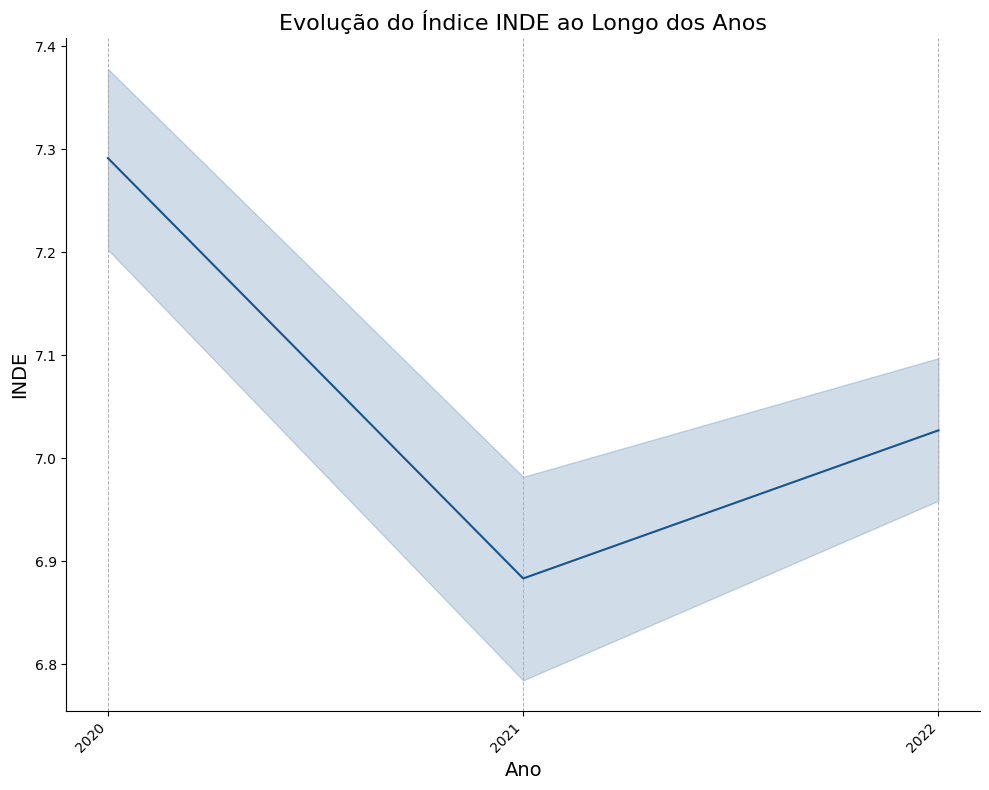

In [ ]:
plt.figure(figsize=(10, 8))

# Extrair apenas o ano do campo 'ANO'
#df['ANO'] = df['ANO'].dt.year  # Se 'ANO' for do tipo datetime

# Criar gráfico de linhas
sns.lineplot(y='INDE', x='ANO', data=df, color='#18548c')

# Adicionar título e rótulos dos eixos
plt.title('Evolução do Índice INDE ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('INDE', fontsize=14)

# Ajustar visualização dos eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionar grade para o eixo x
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Ajustar o formato dos números no eixo x
plt.xticks(df['ANO'].unique(), rotation=45, ha='right', fontsize=10)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

datetime64[ns]

<ipython-input-148-bd8a0035d073>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ANO'] = df['ANO'].dt.year


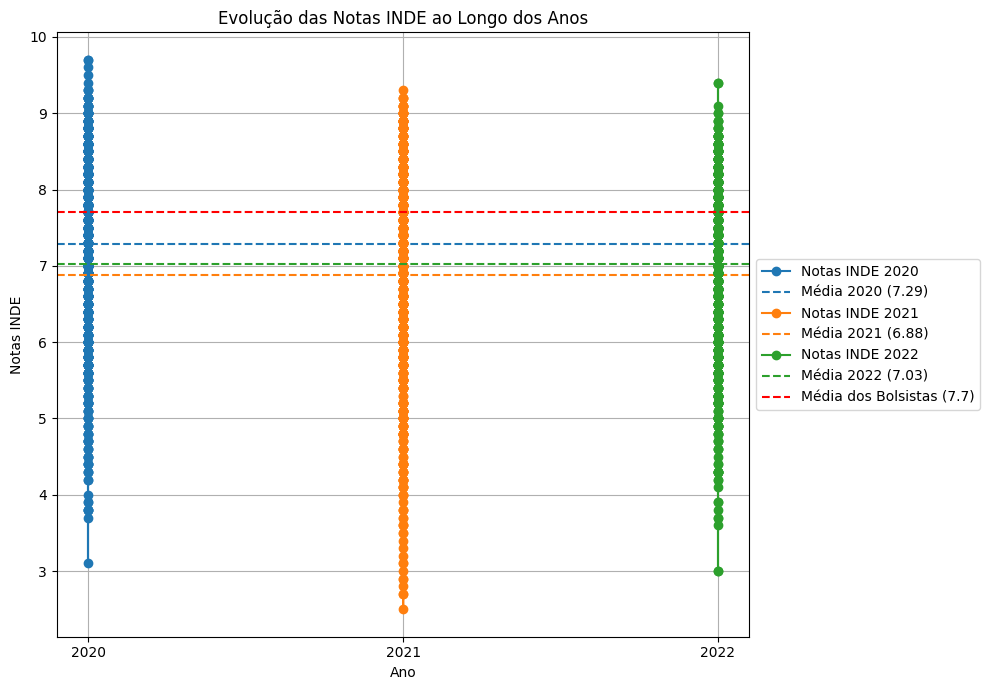

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df já esteja carregado e processado como mostrado
df = df[df['INDE'] != 0]

# Verificar o formato da coluna ANO
print(df['ANO'].dtype)

# Se ANO estiver no formato de datetime, converter para inteiro
if pd.api.types.is_datetime64_any_dtype(df['ANO']):
    df['ANO'] = df['ANO'].dt.year

# Calcular a média das notas INDE por ano
mean_by_year = df.groupby('ANO')['INDE'].mean().reset_index()

# Definir cores para os anos e médias correspondentes
colors = {
    2020: 'tab:blue',
    2021: 'tab:orange',
    2022: 'tab:green',
}

plt.figure(figsize=(10, 7))
for year in df['ANO'].unique():
    # Filtrar dados por ano
    data_year = df[df['ANO'] == year]
    plt.plot(data_year['ANO'], data_year['INDE'], marker='o', linestyle='-', color=colors[year], label=f'Notas INDE {year}')

    # Encontrar a média para o ano correspondente
    mean_year = mean_by_year[mean_by_year['ANO'] == year]['INDE'].values[0]
    plt.axhline(mean_year, color=colors[year], linestyle='--', label=f'Média {year} ({mean_year:.2f})')

# Adicionar linha horizontal representando a média dos bolsistas
plt.axhline(7.7, color='red', linestyle='--', label='Média dos Bolsistas (7.7)')

plt.title('Evolução das Notas INDE ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Notas INDE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Posicionar a legenda fora do gráfico
plt.grid(True)
plt.xticks(df['ANO'].unique())  # Definir os anos como ticks no eixo x
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()
